# Binary_correlation_plots

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import gseapy as gp
import re

import cptac
import cptac.utils as u

import plot_utils as p

# Select two cancers for the plot

In [5]:
g = cptac.Gbm()
brca = cptac.Brca()

cptac warning: The GBM dataset is under publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


In [98]:
def create_prot_list(df):
    df = df.loc[:,~df.columns.duplicated()]
    prot_genes_list = df.columns.values.tolist()
    prot_genes_list.remove('EGFR_proteomics')
    prot_genes_list.remove('EGFR_Mutation')
    prot_genes_list.remove('EGFR_Location')
    prot_genes_list.remove('EGFR_Mutation_Status')
    prot_genes_list.remove('Sample_Status')
    return prot_genes_list

# Calculate FDR-bh (lowest sig p-value = cutoff)

Gbm Pearson Correlation

In [84]:
gene = 'EGFR'
df1 = g.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes= gene)
df1_tumor = df1.loc[df1['Sample_Status'] == "Tumor"]
prot_genes_list = create_prot_list(df1_tumor)


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 93 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


In [83]:
# Get only sig genes
g_sig= p.wrap_pearson_corr(df1_tumor,"EGFR_proteomics",comparison_columns= prot_genes_list,correction_method='fdr_bh', return_all = False)
g_sig
# get_smallest p-value
cutoff_gbm = g_sig.P_value[-1:]
cutoff_gbm

90    0.007264
Name: P_value, dtype: float64

Brca Pearson Correlation

In [97]:
gene = 'EGFR'

df1 = brca.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes= gene)
df1.columns = df1.columns.droplevel(1)
df1_tumor = df1.loc[df1['Sample_Status'] == "Tumor"]
prot_genes_list = create_prot_list(df1_tumor)


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 118 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 3)


Name,A1BG_proteomics,A2M_proteomics,A2ML1_proteomics,AAAS_proteomics,AACS_proteomics,AADAT_proteomics,AAED1_proteomics,AAGAB_proteomics,AAK1_proteomics,AAMDC_proteomics,...,ZWINT_proteomics,ZXDC_proteomics,ZYG11B_proteomics,ZYX_proteomics,ZZEF1_proteomics,ZZZ3_proteomics,EGFR_Mutation,EGFR_Location,EGFR_Mutation_Status,Sample_Status
Patient_ID,,,,,,,,,,,,,,,,,,,,,
CPT000814,-0.6712,-0.2075,2.7959,1.3969,-1.0899,NaN,1.6708,-0.3484,-0.4756,-0.7299,...,1.3910,-2.1230,0.9136,-0.8082,-1.4793,0.9136,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
CPT001846,1.3964,1.3302,-5.0948,0.7674,-1.6845,NaN,2.1022,-0.5814,0.2916,-2.2857,...,-0.2137,-2.1219,0.0860,2.5814,-0.2852,-0.1074,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
X01BR001,2.0219,1.6269,-3.2943,0.3352,-1.0739,1.2255,0.2754,-1.1187,-0.0534,-0.2519,...,-0.5316,NaN,0.4996,0.7622,-1.5607,0.0256,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
X01BR008,-0.5290,0.3267,1.4342,0.4938,-2.8676,NaN,NaN,-1.0691,-0.3643,-1.8173,...,0.7546,1.7889,-0.2499,-0.2590,-0.1263,0.3725,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
X01BR009,1.2556,3.4489,2.8043,-0.2956,-1.7261,NaN,NaN,-2.0471,-0.3547,-0.8298,...,-0.4189,0.3080,0.5057,0.2181,-0.2288,-0.2750,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X21BR001,-0.6610,-0.6402,-4.8578,1.2319,-1.6491,NaN,NaN,-0.3074,-0.3074,-0.0266,...,-0.5570,2.3864,0.3764,-0.6974,1.3541,1.1123,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
X21BR002,-1.3735,0.4227,-4.9553,0.6327,-3.1434,NaN,NaN,0.3071,0.7562,-1.6912,...,-1.4444,-0.3704,0.4909,0.3938,0.2992,-0.3494,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
X21BR010,1.1583,0.3329,-5.7358,-0.1658,-2.0413,-1.2433,0.9090,-0.2410,0.6717,-0.1651,...,-0.9444,-1.9717,0.0650,0.6300,-0.0686,0.1798,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor


In [99]:


# Get only sig sites
brca_sig= p.wrap_pearson_corr(df1_tumor,"EGFR_proteomics",comparison_columns= prot_genes_list,correction_method='fdr_bh', return_all = False)
brca_sig
# get_smallest p-value
cutoff_brca = brca_sig.P_value[-1:]
cutoff_brca

2058    0.013554
Name: P_value, dtype: float64

Read in data frame that has all pearson correlations/ pvalues for all egfr trans genes. Subset down for just brca/gbm 

In [100]:
prot_df = pd.read_csv("Step3.2_combining_pearson_dfs/csv_files/pancan_EGFR_all_return_all_wide.csv")
prot_df = prot_df[["Comparison","Correlation_Gbm","P_value_Gbm","Correlation_Brca","P_value_Brca"]]

prot_df

,Comparison,Correlation_Gbm,P_value_Gbm,Correlation_Brca,P_value_Brca
0,EGFR_proteomics,1.000000,0.000000e+00,1.000000,0.000000
1,PHLDA1_proteomics,0.816848,6.553435e-25,0.364797,0.000190
2,GRB2_proteomics,-0.610889,1.886384e-11,-0.177379,0.057899
3,SOCS2_proteomics,0.562720,1.343464e-09,NaN,NaN
4,CDH4_proteomics,0.559180,1.790048e-09,NaN,NaN
...,...,...,...,...,...
14047,TFR2_proteomics,NaN,NaN,NaN,NaN
14048,MYBL2_proteomics,NaN,NaN,NaN,NaN
14049,ZSCAN12_proteomics,NaN,NaN,NaN,NaN
14050,ZNF836_proteomics,NaN,NaN,NaN,NaN


# Create df with p-values for all genes in a pathway

In [50]:
# get a list of genes in a complete Pathway 
#This one is from Reactomes Hemostasis pathway
hemostasis_genes = pd.read_csv("~/Downloads/reactome_hemostasis.csv")
heme_genes = hemostasis_genes.Gene.unique()

heme_all_genes = []
for gene in heme_genes:
    gene += "_proteomics"
    heme_all_genes.append(gene)

In [57]:
# Merge dfs of both cancers and keep only genes in a complete pathway
dna_bool = prot_df.Comparison.isin(heme_all_genes)
df = prot_df[dna_bool]
df

,Comparison,Correlation_Gbm,P_value_Gbm,Correlation_Brca,P_value_Brca
2,GRB2_proteomics,-0.610889,1.886384e-11,-0.177379,0.057899
12,SHC1_proteomics,-0.540524,7.695118e-09,0.090908,0.333927
22,TOR4A_proteomics,-0.513847,5.340485e-08,0.089115,0.447068
44,DOCK10_proteomics,-0.489715,2.685098e-07,NaN,NaN
53,APBB1IP_proteomics,-0.483056,4.103970e-07,0.114010,0.225044
...,...,...,...,...,...
13502,PSG1_proteomics,NaN,NaN,NaN,NaN
13534,CALM1_proteomics,NaN,NaN,NaN,NaN
13677,KCNMB1_proteomics,NaN,NaN,NaN,NaN
13766,NFE2_proteomics,NaN,NaN,NaN,NaN


In [59]:
# Create pval only df for Color mapping
pval_df = df.drop(columns = ['Correlation_Gbm','Correlation_Brca'])
pval_df = pval_df.set_index('Comparison')
pval_df.head()

,P_value_Gbm,P_value_Brca
Comparison,,
GRB2_proteomics,1.886384e-11,0.057899
SHC1_proteomics,7.695118e-09,0.333927
TOR4A_proteomics,5.340485e-08,0.447068
DOCK10_proteomics,2.685098e-07,NaN
APBB1IP_proteomics,4.103970e-07,0.225044


# Create the color column based on significance in both cancers 

In [63]:
def Color(row):
    color = 'Not_sig'

    c1_cutoff = 0.007264# lowest p-value for cancer 1 (GBM)
    c2_cutoff = 0.013554 #Brca

    for item in row:
        if pd.isnull(item):
            continue
        if row['P_value_Brca'] <= c1_cutoff and row['P_value_Gbm'] <= c2_cutoff:
            color = 'Both_sig'
        elif row['P_value_Gbm'] <= c1_cutoff:
            color = 'Gbm_sig'
        elif row['P_value_Brca'] <= c2_cutoff:
            color = 'Brca_sig'
           
    return color

In [102]:
print('lowest p-value for Gbm:',cutoff_gbm, '\n')
print('lowest p-value for Brca:',cutoff_brca)

lowest p-value for Gbm: 90    0.007264
Name: P_value, dtype: float64 

lowest p-value for Brca: 2058    0.013554
Name: P_value, dtype: float64


In [103]:
pval_df['Color'] = pval_df.apply(Color, axis=1)
color = pval_df[['Color']]
pval_df.head()

,P_value_Gbm,P_value_Brca,color,Color
Comparison,,,,
GRB2_proteomics,1.886384e-11,0.057899,Gbm_sig,Gbm_sig
SHC1_proteomics,7.695118e-09,0.333927,Gbm_sig,Gbm_sig
TOR4A_proteomics,5.340485e-08,0.447068,Gbm_sig,Gbm_sig
DOCK10_proteomics,2.685098e-07,NaN,Gbm_sig,Gbm_sig
APBB1IP_proteomics,4.103970e-07,0.225044,Gbm_sig,Gbm_sig


# Format df for plot. Add color column and keep correlations.

In [66]:
color_df = color.reset_index()
plot_df = df.merge(color_df, on='Comparison')
plot_df= plot_df.drop(columns=['P_value_Gbm','P_value_Brca'])
plot_df.head()

,Comparison,Correlation_Gbm,Correlation_Brca,color
0,GRB2_proteomics,-0.610889,-0.177379,Gbm_sig
1,SHC1_proteomics,-0.540524,0.090908,Gbm_sig
2,TOR4A_proteomics,-0.513847,0.089115,Gbm_sig
3,DOCK10_proteomics,-0.489715,NaN,Gbm_sig
4,APBB1IP_proteomics,-0.483056,0.114010,Gbm_sig


# Plot

In [104]:
def binary_corr_plot(prepared_df, x_axis_name, y_axis_name, title, save_file_name=None):
    
    color_dict = {'Both_sig':'green',
                  'Brca_sig':'yellow',
                  'Gbm_sig': 'blue',
                  'Not_sig': 'grey'}
    
    sns.set(font_scale = 1.2)
    #sns.axes_style("whitegrid")
    plt.figure(figsize=(10, 10))
    all_pvals = sns.scatterplot(x=prepared_df.columns[1], y=prepared_df.columns[2], data=prepared_df,
                               hue=prepared_df.columns[3], palette=color_dict)
    all_pvals.set_title(title)
        
    plt.xlabel(x_axis_name)
    plt.ylabel(y_axis_name)
    plt.xlim(-.7, .7) 
    plt.ylim(-.7, .7)
    
    if save_file_name is not None:
        plt.savefig(save_file_name+'.png')
    plt.show()
    #plt.clf()
    plt.close()
    return 0


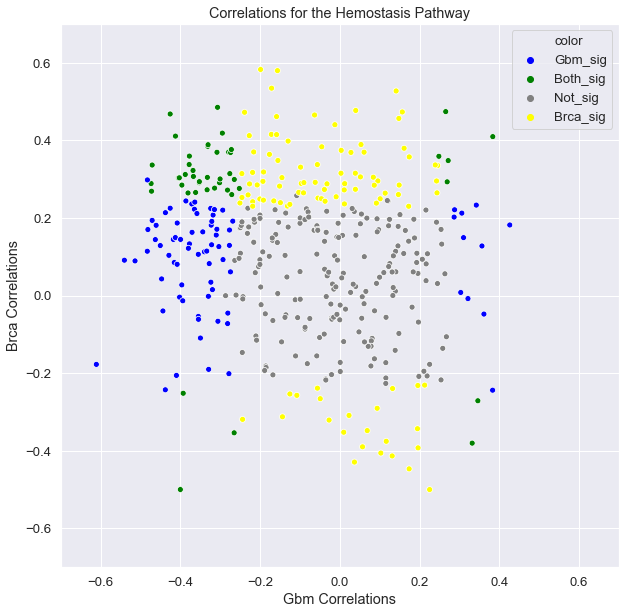

0

In [105]:
binary_corr_plot(plot_df, 'Gbm Correlations', 'Brca Correlations','Correlations for the Hemostasis Pathway')